In [1]:
import pathlib
import pickle as pkl
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt



In [2]:

images_crosswalk = pd.read_csv('/home/alalbiol/Data/mamo/dream_pilot/images_crosswalk.tsv', sep='\t')
print(images_crosswalk.head())

print("cancer images", images_crosswalk.cancer.sum())

   subjectId  examIndex  imageIndex view laterality    filename  cancer
0         20          1           1   CC          R  000135.dcm       0
1         20          1           2   CC          L  000136.dcm       0
2         20          1           3  MLO          L  000137.dcm       0
3         20          1           4  MLO          R  000138.dcm       0
4         98          1           1   CC          R  100151.dcm       0
cancer images 34


In [3]:
annotation_files = list(pathlib.Path('../datasets/dream_pilot/my_rois').glob('*.pkl'))
print("num of annotation files: ", len(annotation_files))

num of annotation files:  24


In [4]:
images_crosswalk['image_id'] = images_crosswalk['subjectId'].apply(lambda X: str(X)) + \
        "_" + images_crosswalk['laterality']  + \
        "_" + images_crosswalk['view'] 

In [5]:
images_crosswalk.head()

,subjectId,examIndex,imageIndex,view,laterality,filename,cancer,image_id
0,20,1,1,CC,R,000135.dcm,0,20_R_CC
1,20,1,2,CC,L,000136.dcm,0,20_L_CC
2,20,1,3,MLO,L,000137.dcm,0,20_L_MLO
3,20,1,4,MLO,R,000138.dcm,0,20_R_MLO
4,98,1,1,CC,R,100151.dcm,0,98_R_CC


In [6]:
images_crosswalk['annotation_file'] = None

images_crosswalk_cancer = images_crosswalk[images_crosswalk['cancer'] == 1].copy()

images_crosswalk_cancer.sort_values(by=['image_id'], inplace=True)

annotation_files = sorted(annotation_files)

problematic_images = {}




for anot in annotation_files:
    anot_id = "_".join(anot.stem.split('_')[:3])
    selected_images = images_crosswalk.loc[images_crosswalk['image_id'] == anot_id]
    num_images = len(selected_images)
    if num_images > 1:
        print(f"Warning: {num_images} images for ", anot.stem)  
        selected_images['annotation_file'] = "exclude"  
        print(selected_images[['subjectId','examIndex', 'imageIndex', 'view','annotation_file']])
        problematic_images[anot] = selected_images.copy()
    else:
        selected_images['annotation_file'] = anot
        images_crosswalk.loc[images_crosswalk['image_id'] == anot_id, 'annotation_file'] = anot
        print(selected_images[['subjectId','examIndex', 'imageIndex', 'view','annotation_file']])
        
        

    subjectId  examIndex  imageIndex view  \
71      10916          1           1   CC   

                                      annotation_file  
71  ../datasets/dream_pilot/my_rois/10916_R_CC_1.2...  
    subjectId  examIndex  imageIndex view  \
74      10916          1           4  MLO   

                                      annotation_file  
74  ../datasets/dream_pilot/my_rois/10916_R_MLO_1....  
     subjectId  examIndex  imageIndex  view annotation_file
124      21107          1           5  CCID         exclude
132      21107          2           5  CCID         exclude
136      21107          2           9  CCID         exclude
     subjectId  examIndex  imageIndex  view annotation_file
124      21107          1           5  CCID         exclude
132      21107          2           5  CCID         exclude
136      21107          2           9  CCID         exclude
     subjectId  examIndex  imageIndex  view annotation_file
124      21107          1           5  CCID         ex

/tmp/ipykernel_745495/2113222170.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_images['annotation_file'] = anot
/tmp/ipykernel_745495/2113222170.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_images['annotation_file'] = anot
/tmp/ipykernel_745495/2113222170.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

21107_R_CCID_1.2.840.113654.2.70.1.149967706931287098397178188980902120806.pkl
possible images: 
     subjectId  examIndex  imageIndex  view laterality    filename  cancer  \
124      21107          1           5  CCID          R  507746.dcm       0   
132      21107          2           5  CCID          R  267631.dcm       1   
136      21107          2           9  CCID          R  267643.dcm       1   

         image_id annotation_file  
124  21107_R_CCID         exclude  
132  21107_R_CCID         exclude  
136  21107_R_CCID         exclude  


'ArithmeticError'

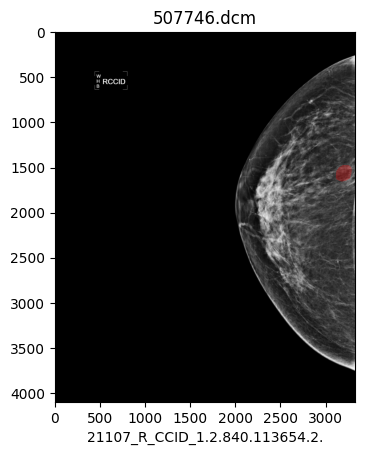

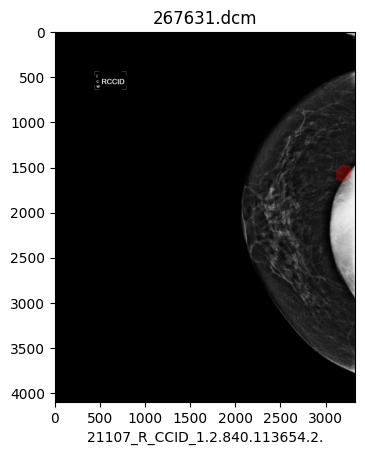

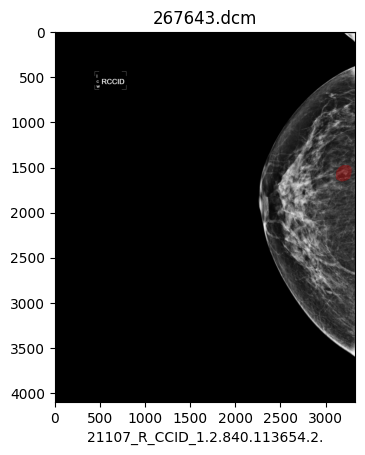

In [7]:
images_folder = pathlib.Path('/home/alalbiol/Data/mamo/dream_pilot/')
problematic_images_id = list(problematic_images.keys())

problematic_image_id = problematic_images_id[0]


a = pkl.load(open(problematic_image_id, 'rb'), encoding='latin1')
possible_images = problematic_images[problematic_image_id]

print(problematic_image_id.name)
print("possible images: ")
print(possible_images)

for k in range(len(possible_images)):
    image_name = possible_images.iloc[k]['filename']
    image_name = images_folder / image_name
    im = pydicom.dcmread(image_name).pixel_array
    im=(255.*im/im.max()).astype(np.uint8)
    plt.figure()
    plt.imshow(im, cmap='gray')
    x = a[0]['points'][:,0]
    y = a[0]['points'][:,1]
    plt.fill(x, y, 'r', alpha=0.3)
    plt.title(image_name.name)
    plt.xlabel(problematic_image_id.stem[:30])
"ArithmeticError"
        
        
        


21107_R_CCID_1.2.840.113654.2.70.1.316212353352402572276442367692024010385.pkl
possible images: 

     subjectId  examIndex  imageIndex  view laterality    filename  cancer  \
124      21107          1           5  CCID          R  507746.dcm       0   
132      21107          2           5  CCID          R  267631.dcm       1   
136      21107          2           9  CCID          R  267643.dcm       1   

         image_id annotation_file  
124  21107_R_CCID         exclude  
132  21107_R_CCID         exclude  
136  21107_R_CCID         exclude  


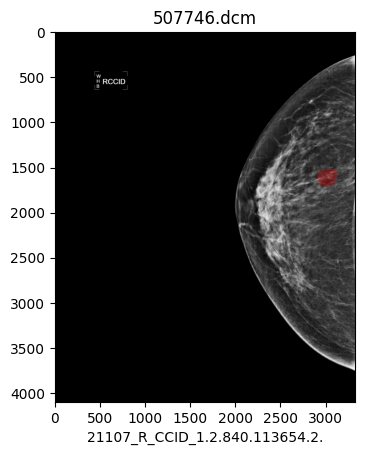

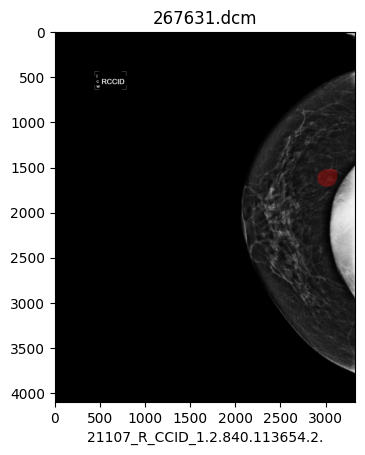

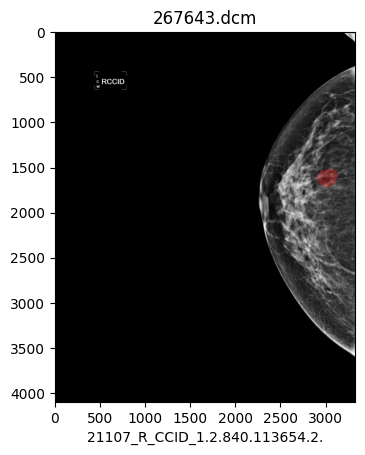

In [8]:
images_folder = pathlib.Path('/home/alalbiol/Data/mamo/dream_pilot/')
problematic_images_id = list(problematic_images.keys())

problematic_image_id = problematic_images_id[1]


a = pkl.load(open(problematic_image_id, 'rb'), encoding='latin1')
possible_images = problematic_images[problematic_image_id]
print(problematic_image_id.name)
print("possible images: \n"),
print(possible_images)

for k in range(len(possible_images)):
    image_name = possible_images.iloc[k]['filename']
    image_name = images_folder / image_name
    im = pydicom.dcmread(image_name).pixel_array
    im=(255.*im/im.max()).astype(np.uint8)
    plt.figure()
    plt.imshow(im, cmap='gray')
    x = a[0]['points'][:,0]
    y = a[0]['points'][:,1]
    plt.fill(x, y, 'r', alpha=0.3)
    plt.title(image_name.name)
    plt.xlabel(problematic_image_id.stem[:30])

        


In [9]:
pilot_images = pathlib.Path('/home/alalbiol/Data/mamo/dream_pilot').glob('*.dcm')

for image in pilot_images:
    data = pydicom.dcmread(image)
    print(data['SeriesInstanceUID'])
    kk = data['SeriesInstanceUID'].value
    break
print(kk)

(0020, 000e) Series Instance UID                 UI: 1.2.840.113654.2.70.1.250677134488981848913729746703190355257
1.2.840.113654.2.70.1.250677134488981848913729746703190355257


In [22]:
pilot_images = list(images_folder.glob('*.dcm'))
series_uids = []
for image in pilot_images:
    data = pydicom.dcmread(image)
    series_uids.append(data['SeriesInstanceUID'].value)
    
    


In [39]:
#save anotations in labels folder
labels_folder = pathlib.Path('/home/alalbiol/Data/mamo/dream_pilot_yolo/labels')
if not labels_folder.exists():
    labels_folder.mkdir()


In [42]:

for anotation_file in annotation_files:
    series_uid = anotation_file.stem.split('_')[-1]
    #find indx in series_uids
    indx = series_uids.index(series_uid)
    print(pilot_images[indx].stem)
    
    img = pydicom.dcmread(pilot_images[indx]).pixel_array
    img = np.array(img)
    W, H = img.shape[1], img.shape[0]
    annotations = pkl.load(open(anotation_file, 'rb'), encoding='latin1')
    
    dicom_stem = pilot_images[indx].stem
    dest_file = labels_folder / (dicom_stem  + '.txt')
    print("saving to ", dest_file)
    with open(dest_file, 'w') as f:
        for annotation in annotations:
            desc = annotation['desc']
            label = 1 if desc[0] == 'm' else 0
            points = annotation['points']
            xmin = min(points[:,0])
            xmax = max(points[:,0])
            ymin = min(points[:,1])
            ymax = max(points[:,1])
            x = (xmin + xmax) / 2 / W
            y = (ymin + ymax) / 2 / H
            w = (xmax - xmin) / W
            h = (ymax - ymin) / H
            f.write(f"{label} {x} {y} {w} {h}\n")
    
    

151892
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/151892.txt
151901
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/151901.txt
267643
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/267643.txt
507746
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/507746.txt
267631
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/267631.txt
507766
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/507766.txt
267639
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/267639.txt
337668
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/337668.txt
337671
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/337671.txt
317772
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/317772.txt
317777
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/317777.txt
121176
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labels/121176.txt
121179
saving to  /home/alalbiol/Data/mamo/dream_pilot_yolo/labe

In [ ]:




dicom_images = []
images_folder = pathlib.Path('/home/alalbiol/Data/mamo/dream_pilot/')
for anot in annotation_files:
    dicom_images.append(find_dicom_file(anot, images_folder))


df_annotation = pd.DataFrame({'annotation_filename': annotation_files})


In [13]:
annotation_files[0]

PosixPath('../datasets/dream_pilot/my_rois/10916_R_CC_1.2.840.113654.2.70.1.215994903526119090282820435255006394471.pkl')